In [1]:
#pip install imblearn

In [53]:
import numpy as pn
import pandas as ps 
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import statsmodels
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn.metrics import confusion_matrix
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import preprocessing
from scipy.stats import shapiro
from scipy import stats
import matplotlib.pyplot as mt
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
mt.rcParams['figure.figsize'] = [15,8]

In [54]:
fd=ps.read_csv("C:/Users/Harshit/Downloads/bank.csv.csv",index_col=False,sep=";")

In [55]:
fd

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# EDA

In [56]:
fd.shape

(41188, 21)

In [57]:
fd.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [58]:
for x in fd:
    print(x)

age
job
marital
education
default
housing
loan
contact
month
day_of_week
duration
campaign
pdays
previous
poutcome
emp.var.rate
cons.price.idx
cons.conf.idx
euribor3m
nr.employed
y


In [59]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [60]:
fd.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [61]:
# As we can clearly see that Data is clean 
fd.isnull().sum()/len(fd)*100

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

In [62]:
fd.describe(exclude=[object])

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [63]:
# Imbalacity in Data
fd.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [64]:
ps.pivot_table(fd,index=["loan"],values=["y"])

""
loan
no
unknown
yes


### Checking For Outliers

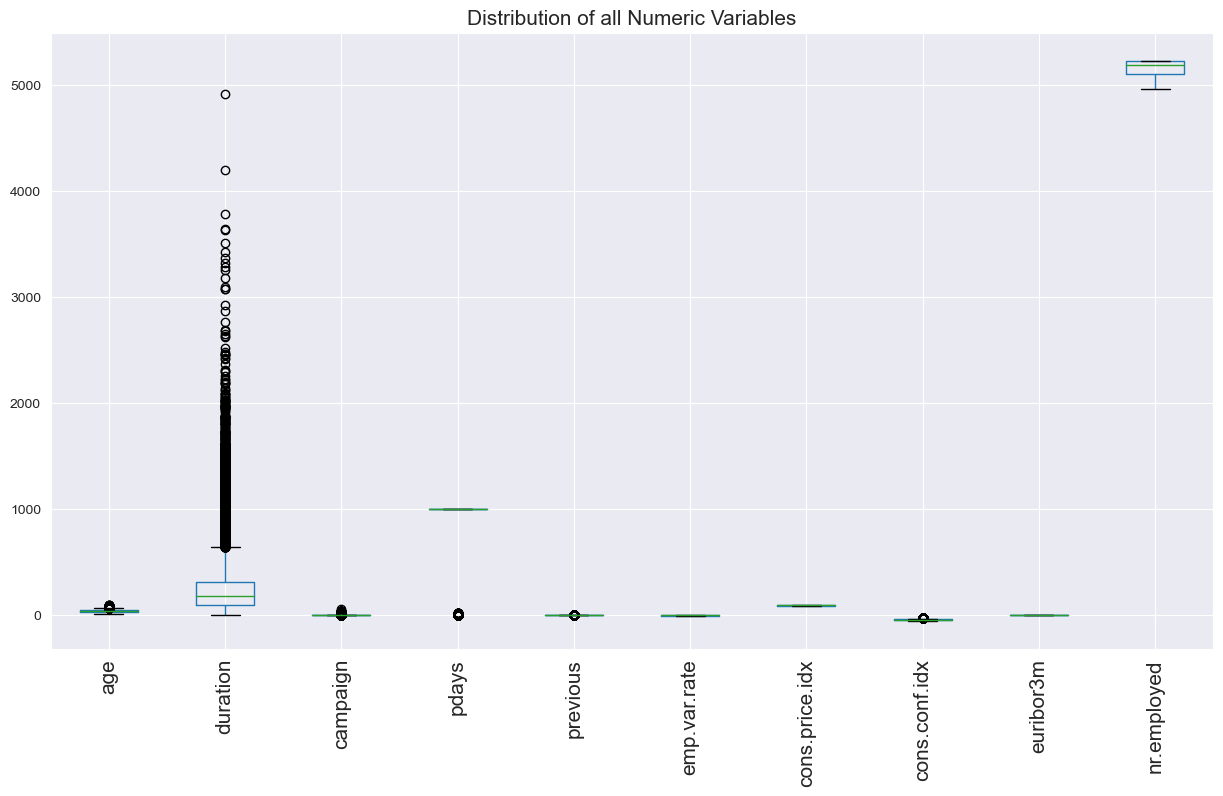

In [65]:
fd.boxplot()
mt.title('Distribution of all Numeric Variables', fontsize = 15)
mt.xticks(rotation = 'vertical', fontsize = 15)
mt.show()

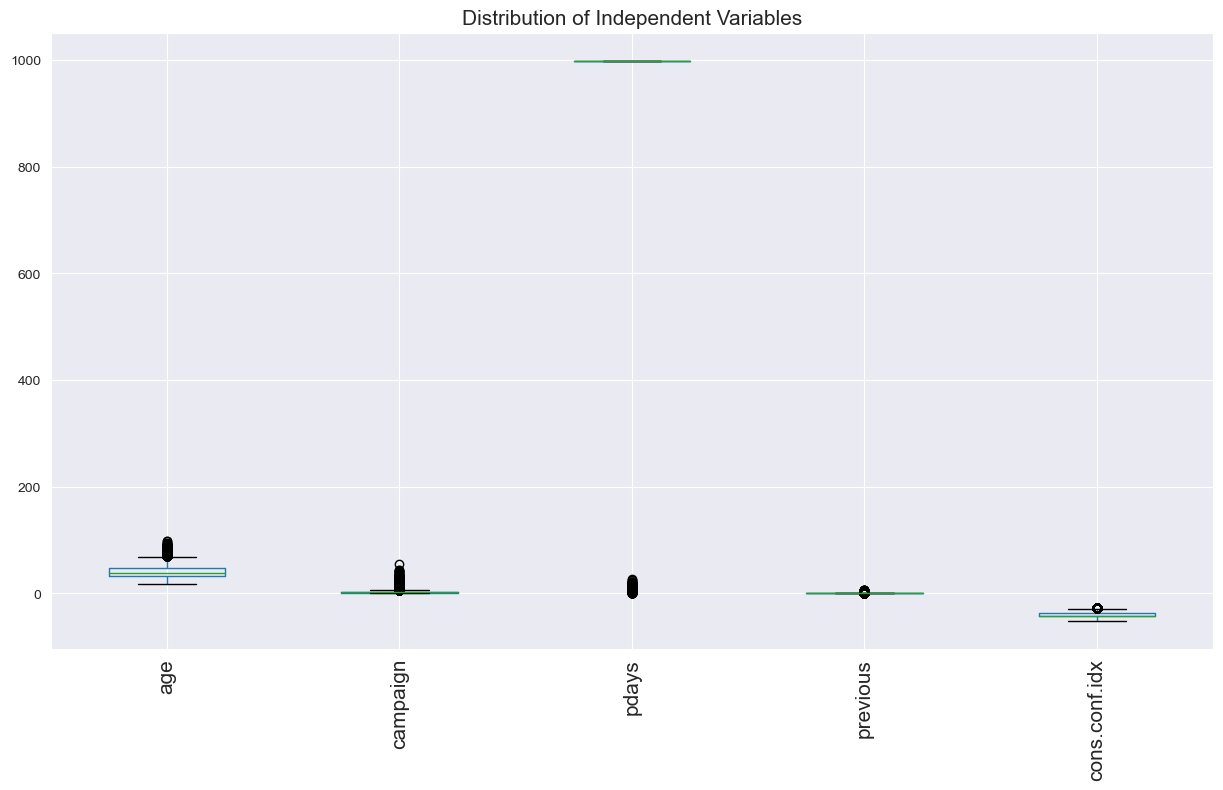

In [66]:
cols = [ 'age','campaign','pdays','previous','cons.conf.idx']
fd[cols].boxplot()
mt.title('Distribution of Independent Variables', fontsize = 15)
mt.xticks(rotation = 'vertical', fontsize = 15)
mt.show()

Inter Quantile Range (IQR)

In [67]:
# calculate the first quartile
Q1 = fd.quantile(0.25)

# calculate the third quartile
Q3 = fd.quantile(0.75)

# Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

age                15.000
duration          217.000
campaign            2.000
pdays               0.000
previous            0.000
emp.var.rate        3.200
cons.price.idx      0.919
cons.conf.idx       6.300
euribor3m           3.617
nr.employed       129.000
dtype: float64


In [68]:
fd= fd[~((fd < (Q1 - 1.5 * IQR)) | (fd > (Q3 + 1.5 * IQR))).any(axis=1)]
fd= fd.reset_index(drop = True)

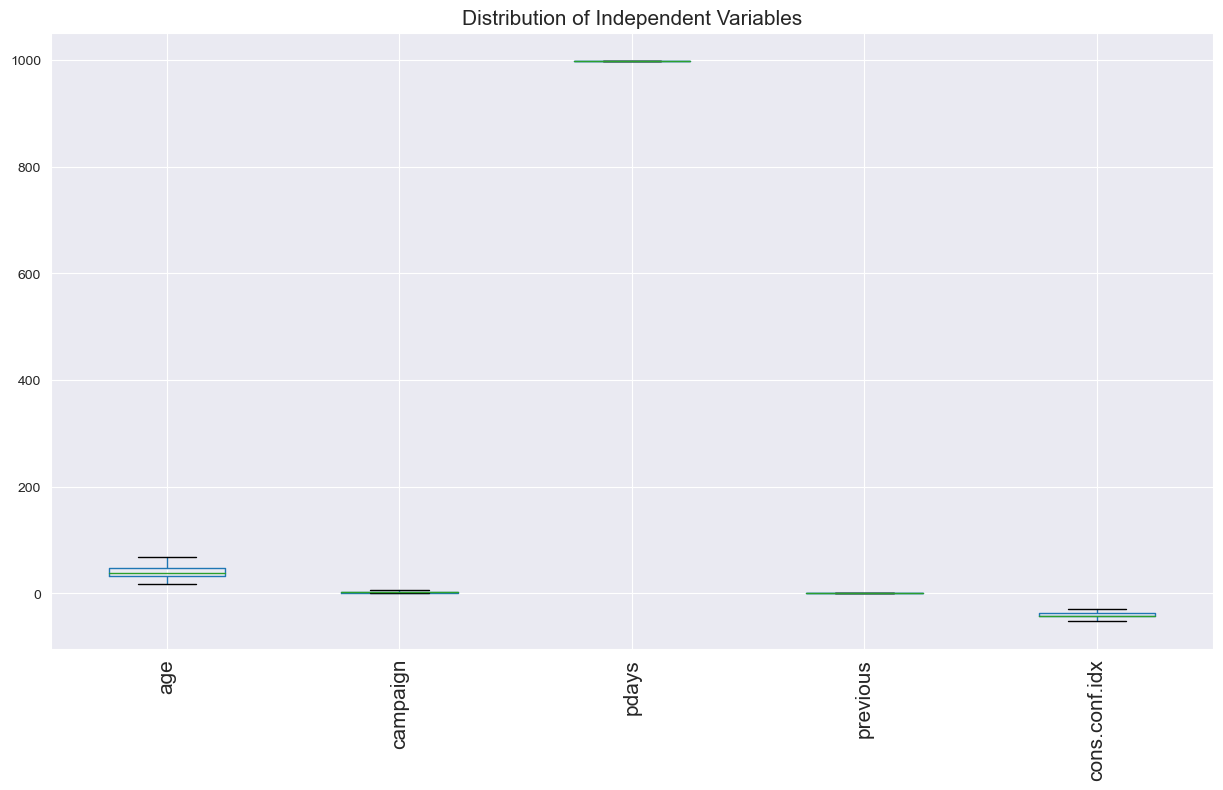

In [69]:
cols = [ 'age','campaign','pdays','previous','cons.conf.idx']
fd[cols].boxplot()
mt.title('Distribution of Independent Variables', fontsize = 15)
mt.xticks(rotation = 'vertical', fontsize = 15)
mt.show()

In [71]:
fd.shape

(30360, 21)

### Label Encoding

In [73]:
# Changed Data Type for target varibale
fd['y'] = fd['y'].replace('no', 0)
fd['y'] = fd['y'].replace('yes', 1)
fd.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [74]:
frequency = fd.y.value_counts()
frequency

0    28705
1     1655
Name: y, dtype: int64

In [75]:
fd.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

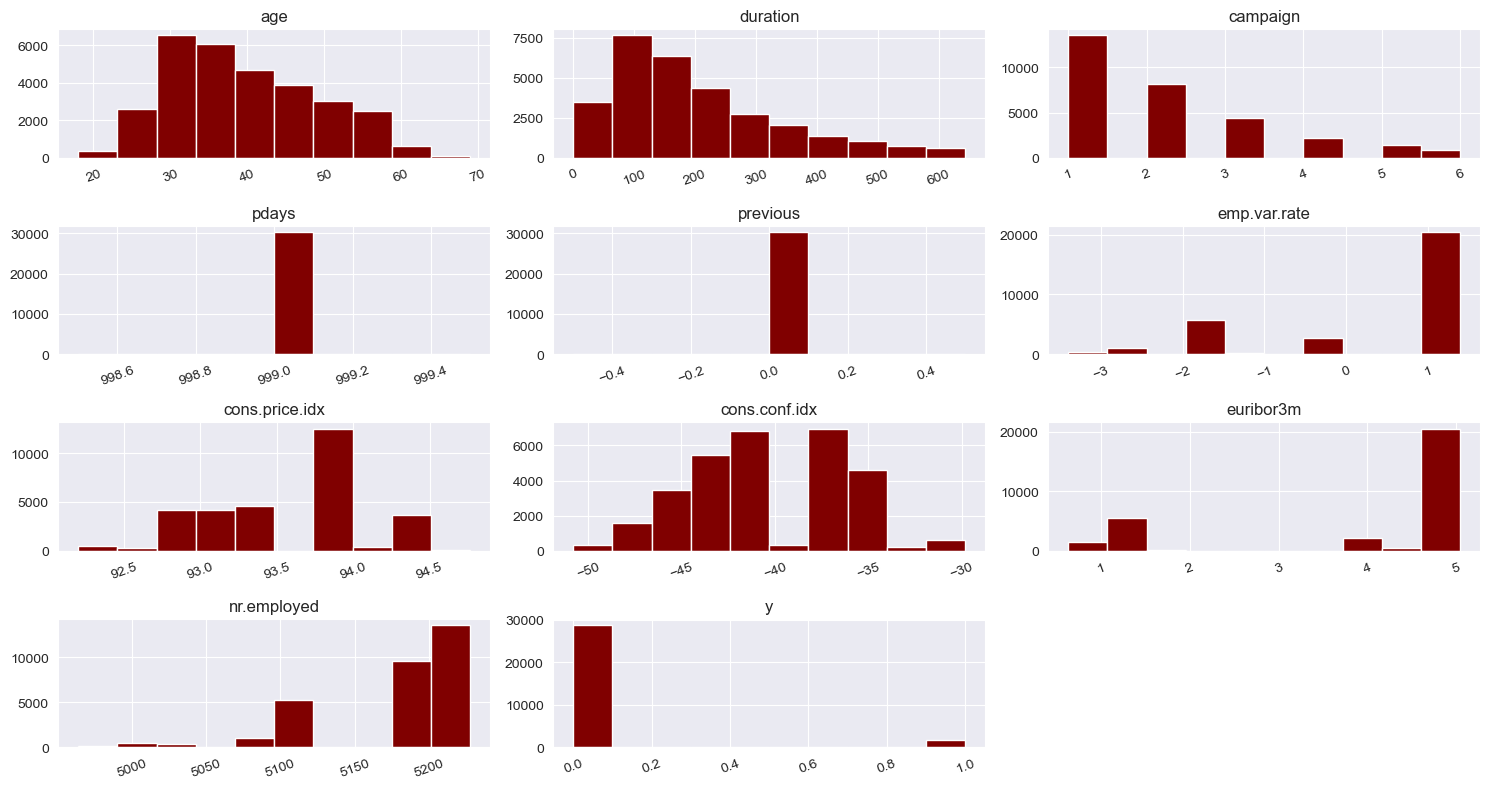

In [76]:
# plot the histogram of numeric variables
# hist() by default considers the numeric variables only, 
# rotate the x-axis labels by 20 degree using the parameter, 'xrot'
fd.hist(xrot = 20, color = "maroon")

# adjust the subplots
mt.tight_layout()

# display the plot
mt.show() 

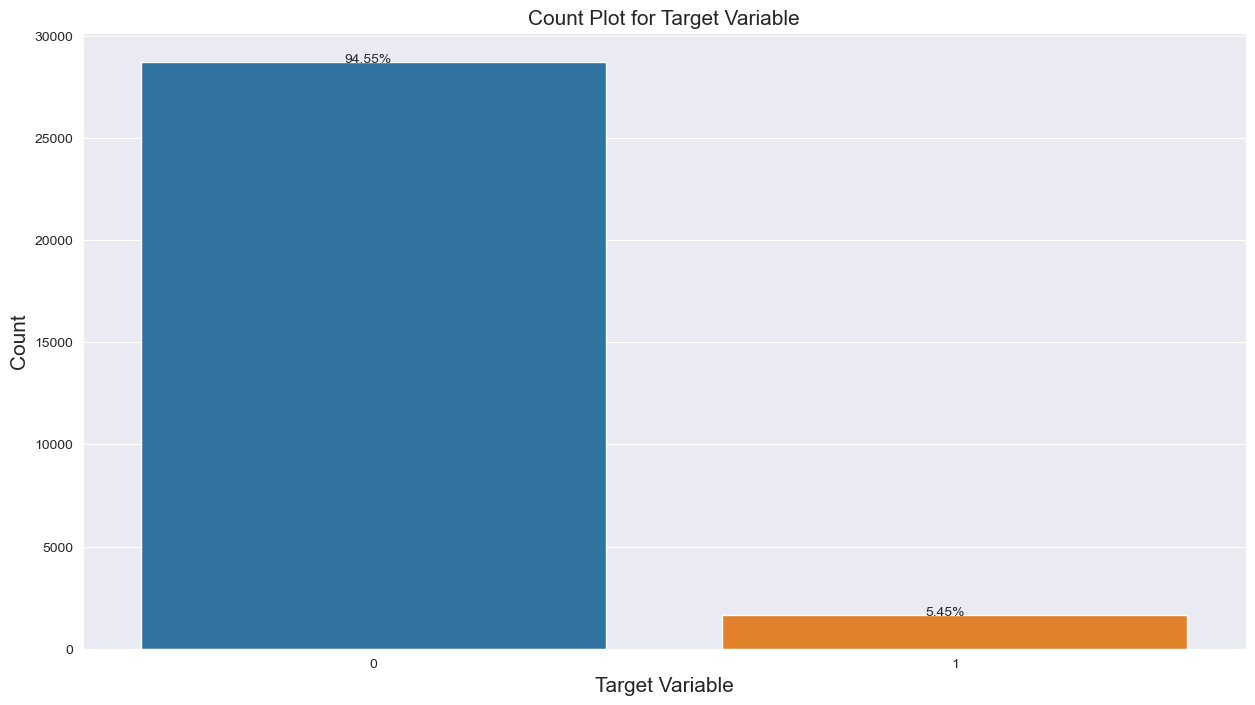

In [77]:
sns.countplot(x = fd.y)
mt.text(x = -0.05, y = fd.y.value_counts()[0],
         s = str(round((frequency[0])*100/len(fd.y),2)) + '%')
mt.text(x = 0.95, y = fd.y.value_counts()[1],
         s = str(round((frequency[1])*100/len(fd.y),2)) + '%')
mt.title('Count Plot for Target Variable', fontsize = 15)
mt.xlabel('Target Variable', fontsize = 15)
mt.ylabel('Count', fontsize = 15)
mt.show()

In [78]:
dummie_data = ps.get_dummies(fd.drop(['y'],axis = 1),drop_first=True)
dummie_data['y'] = fd.y
dummie_data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,1,0,0,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,1,0,0,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,1,0,0,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,1,0,0,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,1,0,0,0,0


In [79]:
X = dummie_data.drop(['y'],axis = 1)
y = dummie_data['y'].astype('int64')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=2000, random_state=0, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2000, n_jobs=-1, random_state=0)

In [82]:
labels = X.columns.values
feature_importance = []
for feature in zip(labels, rf.feature_importances_):
    feature_importance.append(feature)

In [83]:
(feature_importance)

[('age', 0.10393323396251362),
 ('duration', 0.23418600084207372),
 ('campaign', 0.04429474813899226),
 ('pdays', 0.0),
 ('previous', 0.0),
 ('emp.var.rate', 0.0320943638183037),
 ('cons.price.idx', 0.03355677424279689),
 ('cons.conf.idx', 0.03485337655150945),
 ('euribor3m', 0.12044512095345569),
 ('nr.employed', 0.05120320793393512),
 ('job_blue-collar', 0.010747115260628451),
 ('job_entrepreneur', 0.00524243218493696),
 ('job_housemaid', 0.004798149576314784),
 ('job_management', 0.00931852897247957),
 ('job_retired', 0.006546278713625602),
 ('job_self-employed', 0.006047166601537873),
 ('job_services', 0.008219139433259751),
 ('job_student', 0.0065715827665561565),
 ('job_technician', 0.013634801641361154),
 ('job_unemployed', 0.00607964641930324),
 ('job_unknown', 0.0019441024603891936),
 ('marital_married', 0.015726428375666072),
 ('marital_single', 0.014434839699713235),
 ('marital_unknown', 0.0009000157347220019),
 ('education_basic.6y', 0.00500267007166803),
 ('education_basic

In [84]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(rf, threshold=0.01)

In [85]:
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=2000, n_jobs=-1,
                                                 random_state=0),
                threshold=0.01)

In [86]:
selected_features = []
for feature_list_index in sfm.get_support(indices=True):
    selected_features.append(labels[feature_list_index])

In [87]:
data_selected = dummie_data[selected_features]
data_selected.head()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_technician,...,education_professional.course,education_university.degree,housing_yes,loan_yes,contact_telephone,month_mar,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,261,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,57,149,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,37,226,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,1,0,1,0,1,0,0,0
3,40,151,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,56,307,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,1,1,0,1,0,0,0


In [88]:
# Importing SMOTE Libraray
import imblearn
from imblearn.over_sampling import SMOTE

In [89]:
data_selected.head()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_technician,...,education_professional.course,education_university.degree,housing_yes,loan_yes,contact_telephone,month_mar,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,261,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,57,149,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,37,226,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,1,0,1,0,1,0,0,0
3,40,151,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,56,307,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,1,1,0,1,0,0,0


In [90]:
X=data_selected
y=dummie_data['y'].astype('int64')

## Using SMOTE Function to Handle Imbalance Data

In [38]:
#pip install threadpoolctl==3.1.0

In [39]:
sample = SMOTE(random_state=42)
X, y = sample.fit_resample(X, y)

In [40]:
y.value_counts()

0    28705
1    28705
Name: y, dtype: int64

In [41]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 1127
Before OverSampling, counts of label '0': 20125 

After OverSampling, the shape of train_X: (40250, 51)
After OverSampling, the shape of train_y: (40250,) 

After OverSampling, counts of label '1': 20125
After OverSampling, counts of label '0': 20125


# Standadization Data

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler=MinMaxScaler()

In [44]:
scaler.fit(data_selected)

MinMaxScaler()

In [45]:
standardised=scaler.fit_transform(data_selected)

In [46]:
def get_test_report(model):
    
    return(classification_report(y_test,y_pred))

In [47]:
def plot_confusion_matrix(model):
    cm= confusion_matrix(y_test , y_pred)
    conf_matrix = ps.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1',],
                              index=['Actual:0','Actual:1']) 
    sns.heatmap(conf_matrix , annot= True , fmt='d' , cmap= ListedColormap(['lightskyblue']),
               cbar=False , linewidths = 0.1 , annot_kws = { 'size':25})
    mt.xticks(fontsize =20)
    mt.yticks(fontsize = 20)
    mt.show()

In [48]:
def plot_roc(model):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    mt.plot(fpr, tpr)
    mt.xlim([0.0, 1.0])
    mt.ylim([0.0, 1.0])
    mt.plot([0, 1], [0, 1],'r--')
    mt.title('ROC Curve for Loan Classifier', fontsize = 15)
    mt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    mt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    mt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    mt.grid(True)

In [49]:
score_card = ps.DataFrame(columns=['Model', 'AUC Score', 'Precision Score', 'Recall Score',
                                   'Accuracy Score', 'f1-score'])
def update_score_card(model_name):
    global score_card
    score_card = score_card.append({'Model': model_name,
                                    'AUC Score' : roc_auc_score(y_test, y_pred_prob),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)
    return(score_card)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [51]:
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (40187, 23)
y_train (40187,)
X_test (17223, 23)
y_test (17223,)


In [53]:
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy; print("NumPy", numpy.__version__)
import scipy; print("SciPy", scipy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__)

Windows-10-10.0.22621-SP0
Python 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
NumPy 1.23.5
SciPy 1.10.0
Scikit-Learn 1.2.2


In [54]:
import statsmodels.api as sm

In [55]:
log_reg_model = sm.Logit(y_train , X_train).fit()
print(log_reg_model.summary())

Optimization terminated successfully.
         Current function value: 0.196195
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                40187
Model:                          Logit   Df Residuals:                    40164
Method:                           MLE   Df Model:                           22
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                  0.7169
Time:                        17:04:53   Log-Likelihood:                -7884.5
converged:                       True   LL-Null:                       -27855.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
age                              -0.0164      0.002     -7.098      0.

In [56]:
y_pred_prob = log_reg_model.predict(X_test)

In [57]:
y_pred = log_reg_model.predict(X_test)
y_pred.head()

53299    0.999719
40972    0.993101
12428    0.016843
46797    0.992590
21703    0.064958
dtype: float64

In [58]:
y_pre=["0" if x< 0.5 else "1" for x in y_pred]

In [59]:
y_pred=pn.array(y_pre,dtype=pn.float64)
y_pred[0:5]

array([1., 1., 0., 1., 0.])

In [60]:
from sklearn.metrics import classification_report

In [61]:
test=get_test_report(log_reg_model)
print(test)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      8624
           1       0.92      0.92      0.92      8599

    accuracy                           0.92     17223
   macro avg       0.92      0.92      0.92     17223
weighted avg       0.92      0.92      0.92     17223



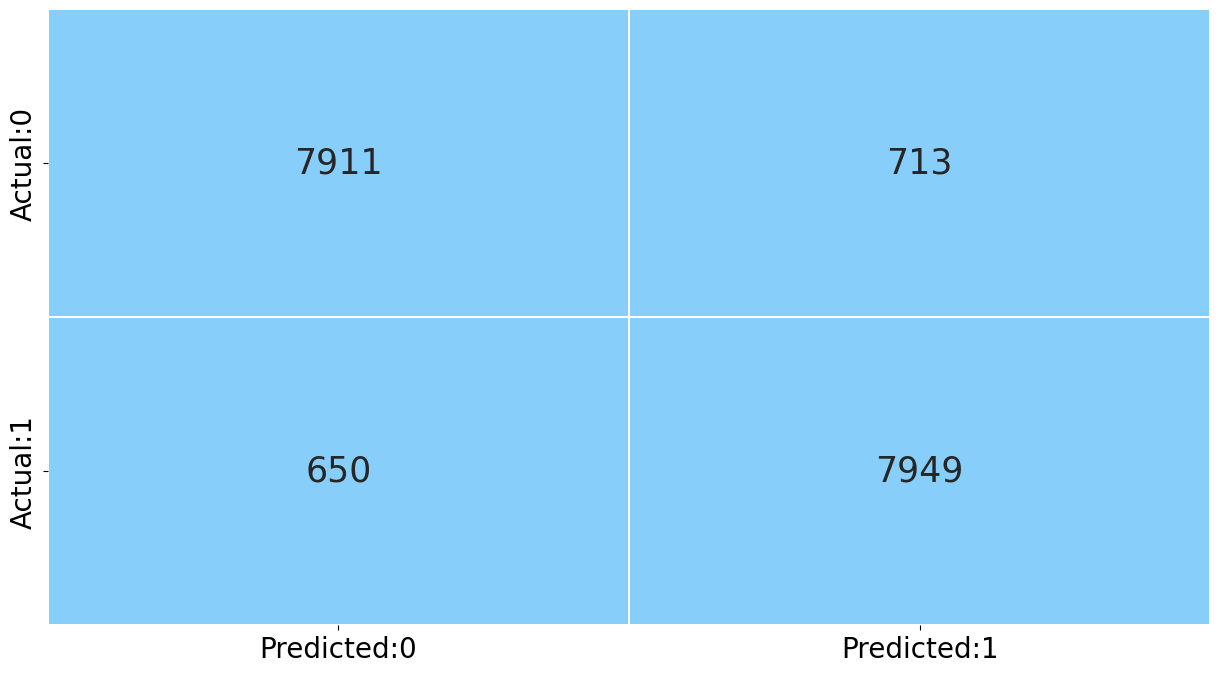

In [62]:
plot_confusion_matrix(log_reg_model)

In [63]:
from sklearn.metrics import roc_auc_score

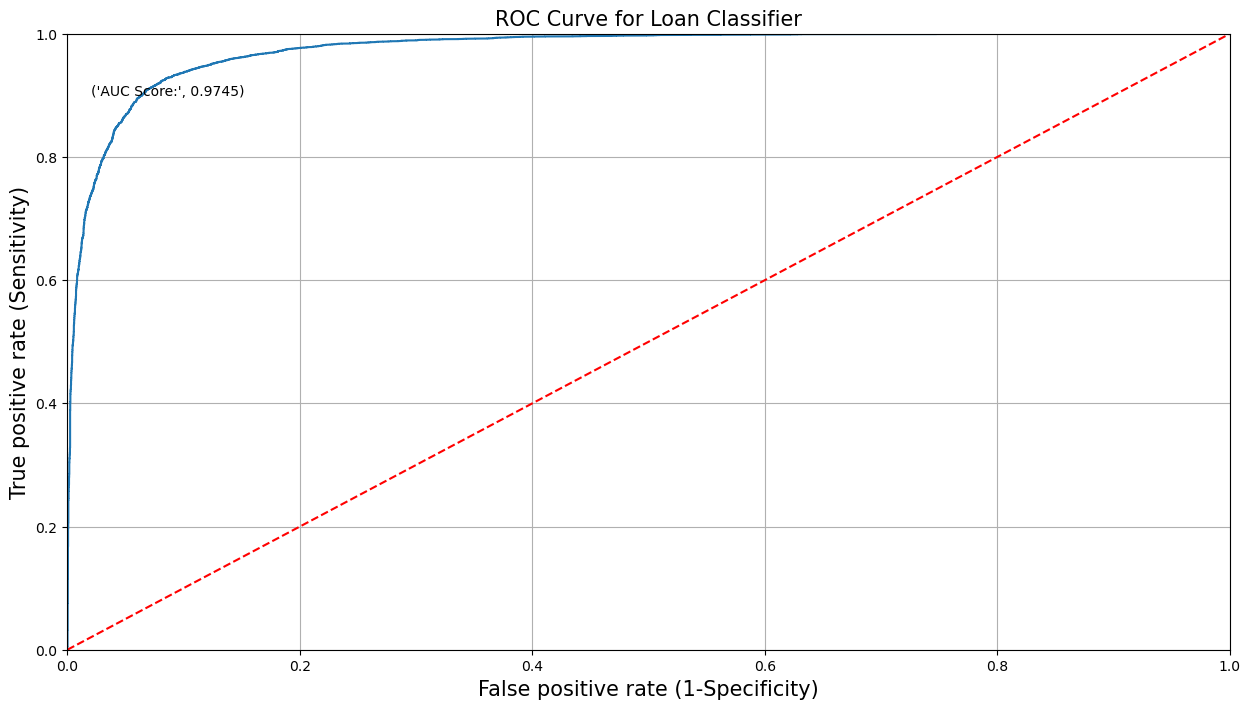

In [64]:
plot_roc(log_reg_model)

In [65]:
update_score_card(model_name= 'logist reg')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,logist reg,0.97449,0.917686,0.92441,0.920862,0.921036


# Adaboost Model

In [66]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(random_state=10)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(random_state=10)

In [67]:
y_pred= adaboost.predict(X_test)

In [68]:
 y_pred_prob = adaboost.predict(X_test)

In [69]:
test=get_test_report(adaboost)
print(test)

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      8624
           1       0.93      0.94      0.94      8599

    accuracy                           0.94     17223
   macro avg       0.94      0.94      0.94     17223
weighted avg       0.94      0.94      0.94     17223



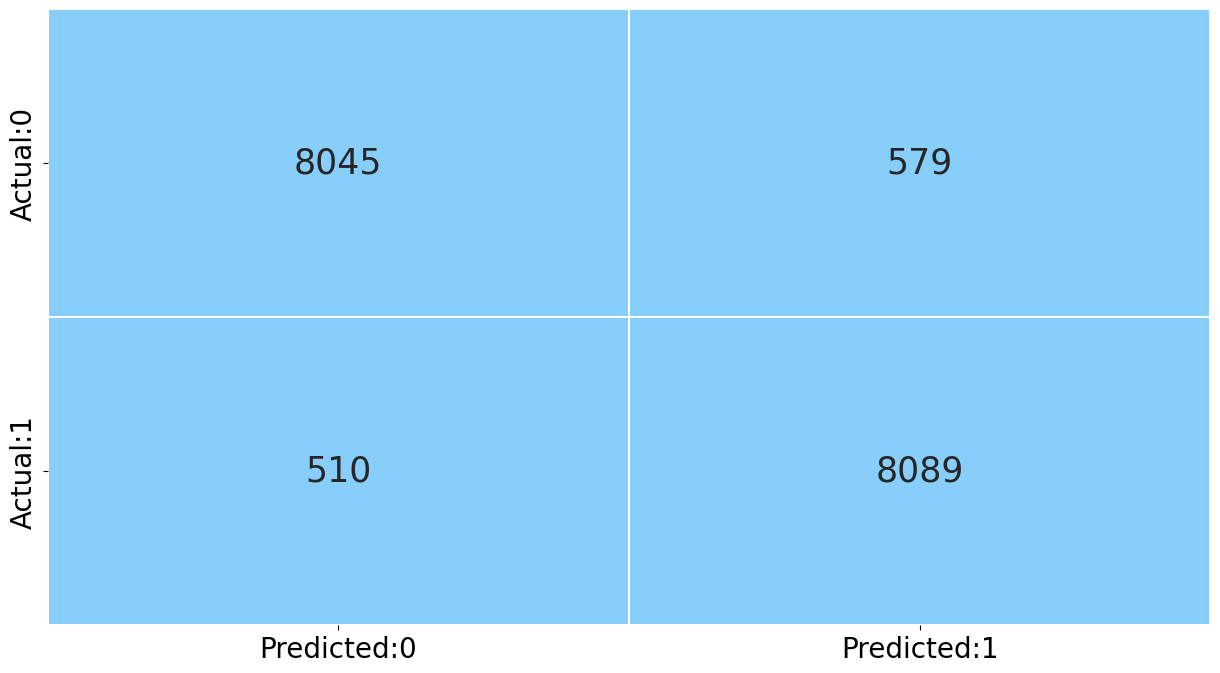

In [70]:
plot_confusion_matrix(adaboost)

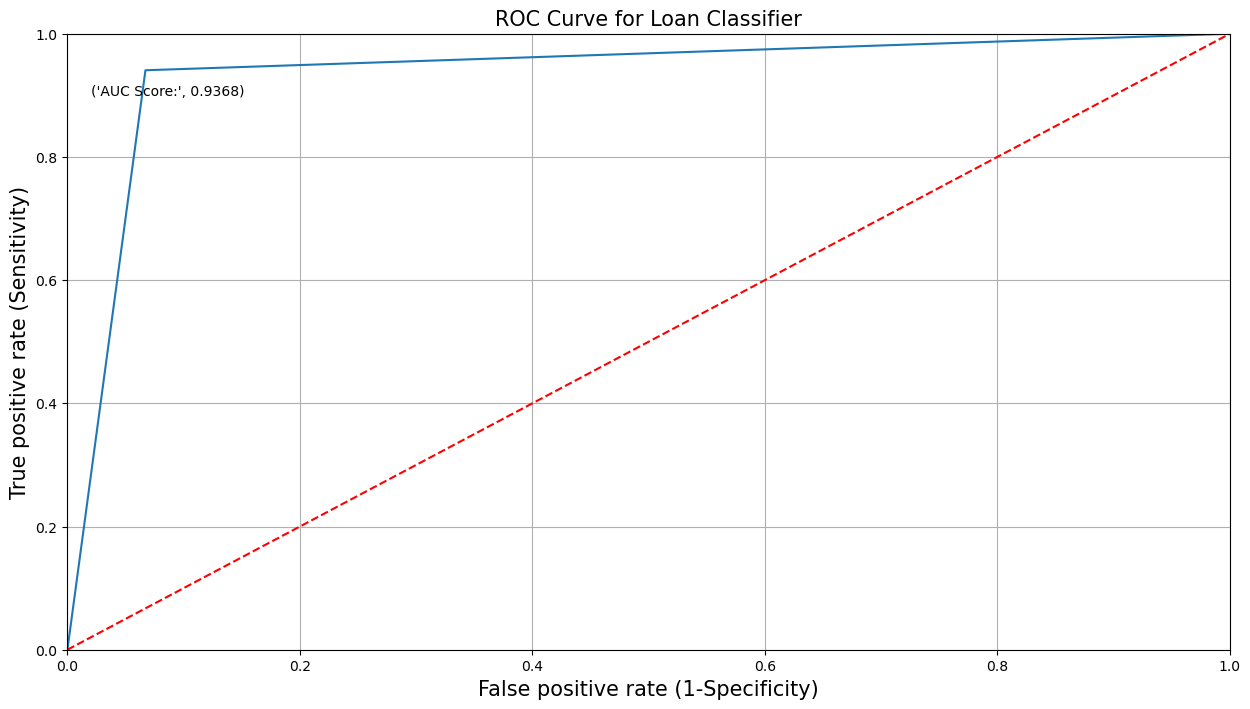

In [71]:
plot_roc(adaboost)

In [72]:
update_score_card(model_name= 'Adaboost')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,logist reg,0.97449,0.917686,0.92441,0.920862,0.921036
1,Adaboost,0.936776,0.933203,0.940691,0.936771,0.936932


# Naive Bayes 

In [73]:
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
gnb = GaussianNB()
GNB = OneVsRestClassifier(gnb)
GNB.fit(X_train, y_train)

OneVsRestClassifier(estimator=GaussianNB())

In [74]:
y_pred= GNB.predict(X_test)

In [75]:
 y_pred_prob = GNB.predict(X_test)

In [76]:
test=get_test_report(GNB)
print(test)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      8624
           1       0.88      0.84      0.86      8599

    accuracy                           0.86     17223
   macro avg       0.87      0.86      0.86     17223
weighted avg       0.87      0.86      0.86     17223



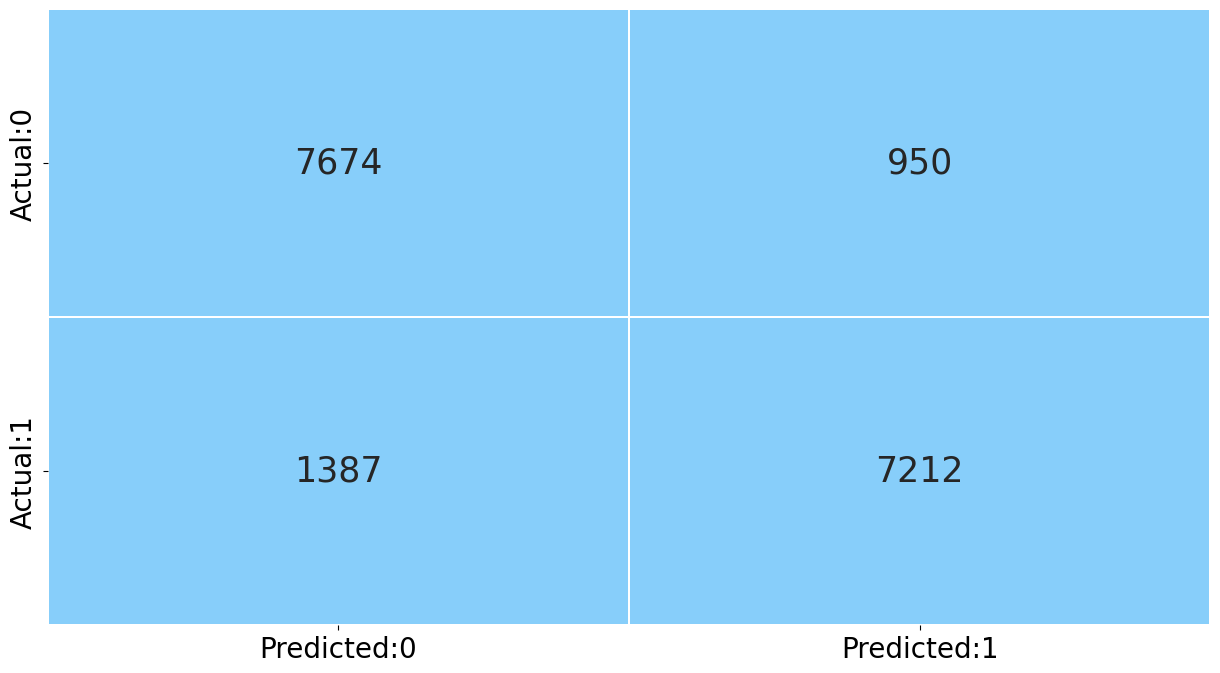

In [77]:
plot_confusion_matrix(GNB)

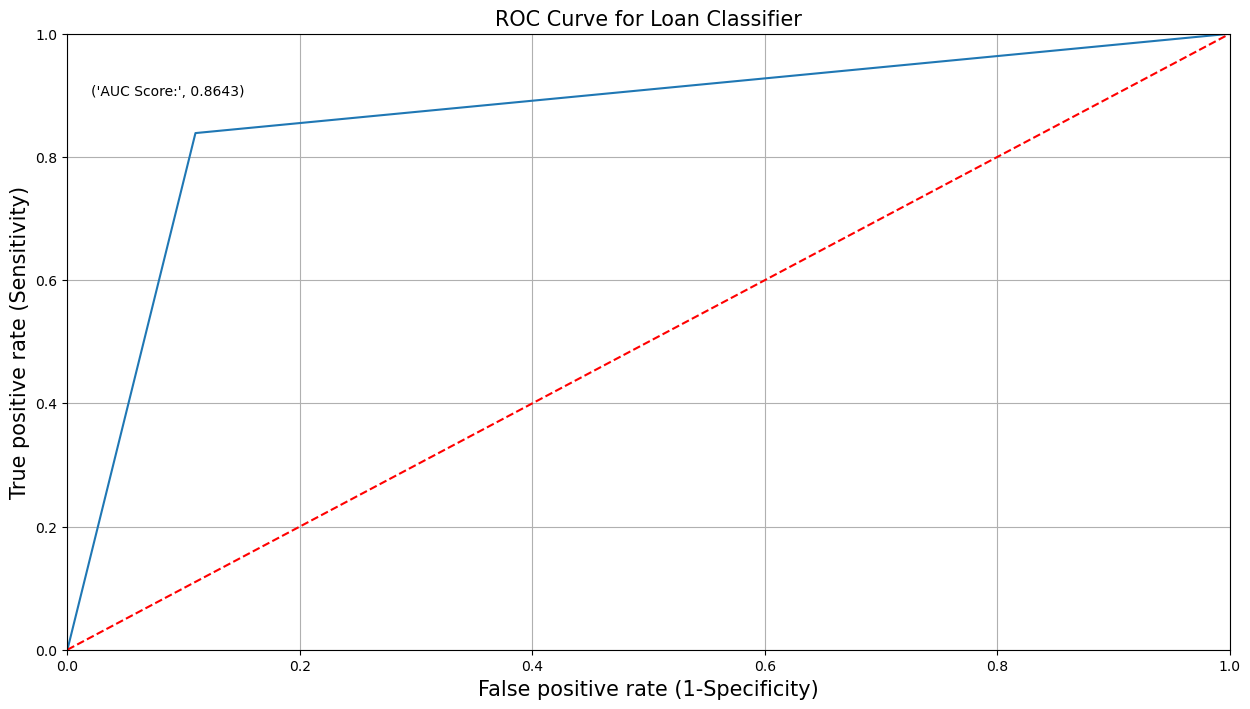

In [78]:
plot_roc(GNB)

In [79]:
update_score_card(model_name= 'GNB')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,logist reg,0.97449,0.917686,0.92441,0.920862,0.921036
1,Adaboost,0.936776,0.933203,0.940691,0.936771,0.936932
2,GNB,0.864272,0.883607,0.838702,0.864309,0.860569


# KNN Model

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn_classification = KNeighborsClassifier(n_neighbors = 3)
knn_model = knn_classification.fit(X_train, y_train)

In [81]:
y_pred= knn_model.predict(X_test)

In [82]:
y_pred_prob = knn_model.predict(X_test)

In [83]:
test=get_test_report(knn_model)
print(test)

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      8624
           1       0.89      0.98      0.94      8599

    accuracy                           0.93     17223
   macro avg       0.94      0.93      0.93     17223
weighted avg       0.94      0.93      0.93     17223



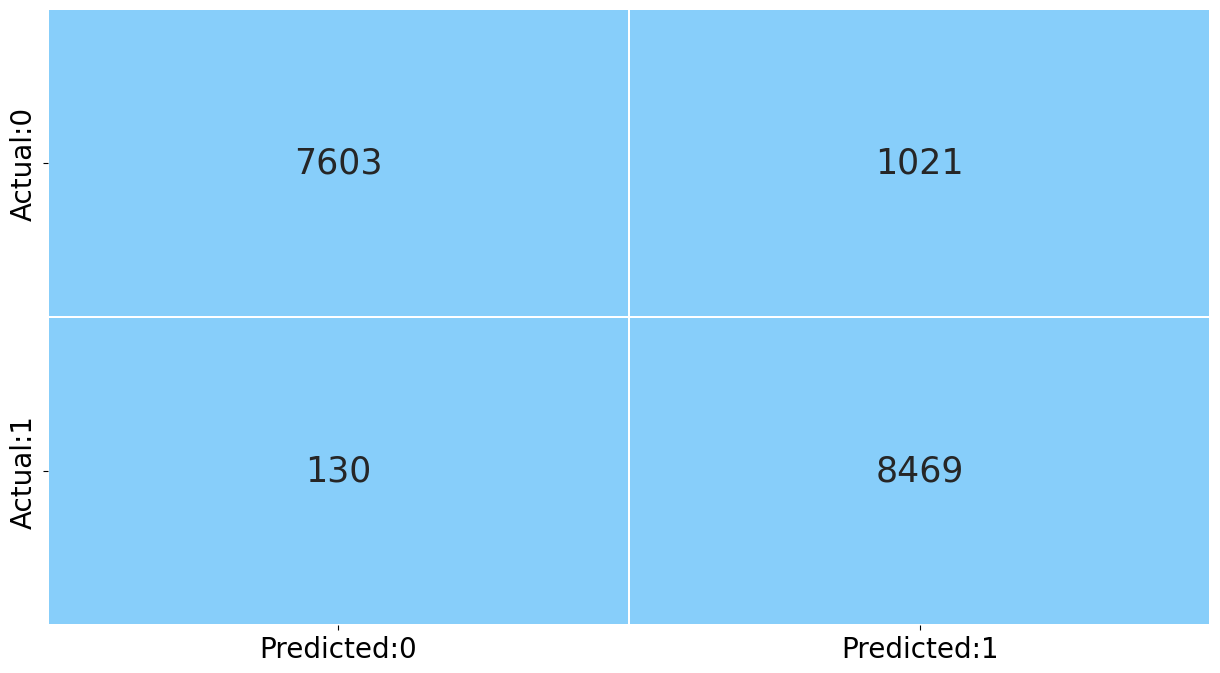

In [84]:
plot_confusion_matrix(knn_model)

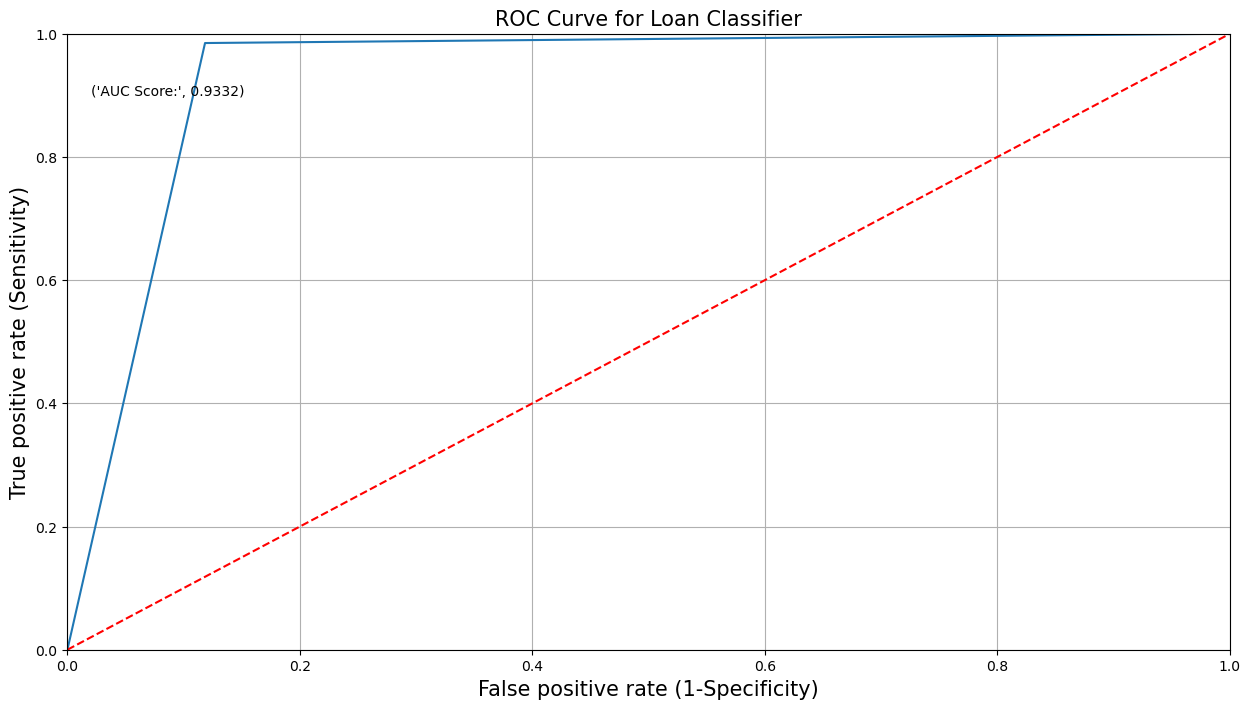

In [85]:
plot_roc(knn_model)

In [86]:
update_score_card(model_name= 'knn_model')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,logist reg,0.97449,0.917686,0.92441,0.920862,0.921036
1,Adaboost,0.936776,0.933203,0.940691,0.936771,0.936932
2,GNB,0.864272,0.883607,0.838702,0.864309,0.860569
3,knn_model,0.933246,0.892413,0.984882,0.933171,0.93637


# SVM Model

In [87]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

SVC()

In [88]:
y_pred= svclassifier.predict(X_test)

In [89]:
 y_pred_prob = svclassifier.predict(X_test)

In [90]:
test=get_test_report(svclassifier)
print(test)

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      8624
           1       0.80      0.88      0.84      8599

    accuracy                           0.83     17223
   macro avg       0.83      0.83      0.83     17223
weighted avg       0.83      0.83      0.83     17223



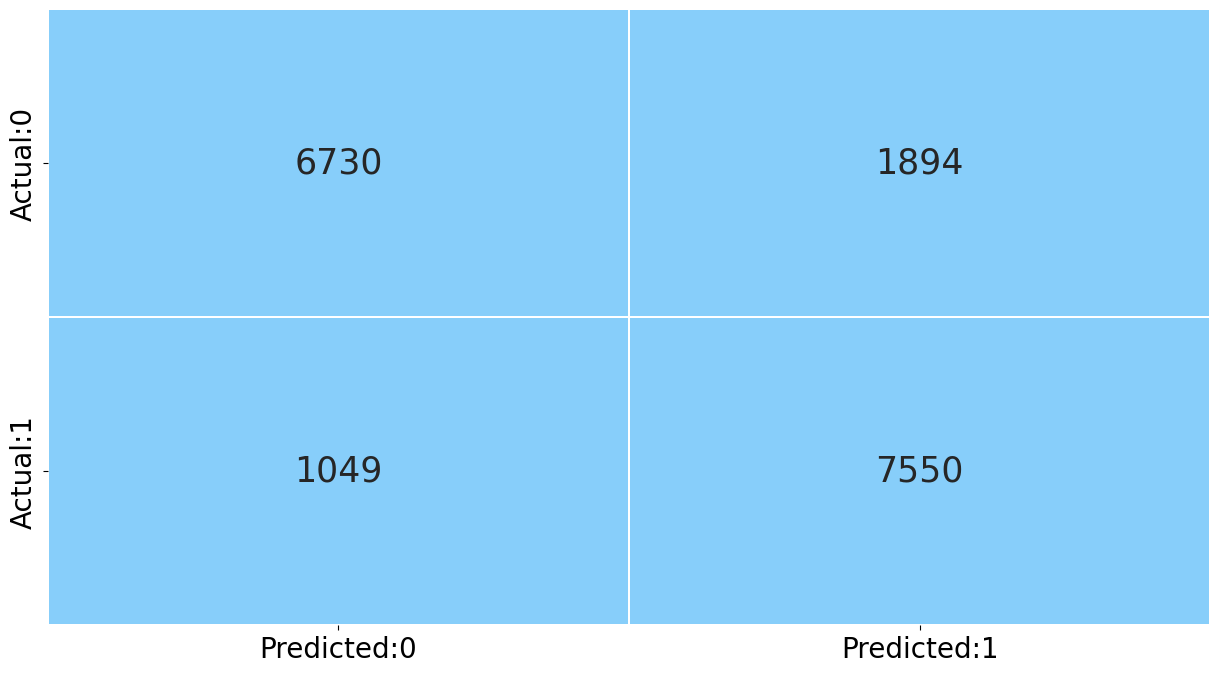

<Figure size 500x800 with 0 Axes>

In [105]:
plot_confusion_matrix(svclassifier)
mt.figure().set_figwidth(5)

In [92]:
update_score_card(model_name= 'svclassifier')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,logist reg,0.97449,0.917686,0.92441,0.920862,0.921036
1,Adaboost,0.936776,0.933203,0.940691,0.936771,0.936932
2,GNB,0.864272,0.883607,0.838702,0.864309,0.860569
3,knn_model,0.933246,0.892413,0.984882,0.933171,0.93637
4,svclassifier,0.829195,0.799449,0.878009,0.829124,0.83689


# 